<a id="2"></a>
# <div style="padding:40px;color:black;margin:0;font-size:55px;font-family:Roboto;text-align:center;display:fill;border-radius:10px;background-color:#008080;overflow:hidden"><b>Age Prediction - Data Science Intermediate I</b></div>

<div style="display:flex;justify-content:center;">
<img src="https://online.hbs.edu/Style%20Library/api/resize.aspx?imgpath=/PublishingImages/hand-reaching-for-predictive-analytics-graphic.jpg&w=1200&h=630"
style="width:700px;height:400px;" />
</div>

<a id="1.1"></a>
<h2 style="font-family: Roboto; font-size: 40px; font-style: normal; font-weight: normal; text-align:center; display:fill; text-decoration: none; padding:20px; letter-spacing: 1px; color: black; background-color:#008080;overflow:hidden;border-radius:10px"><b>Challenge Objectives</h2>

<div style="font-family:Roboto;background-color:black; padding:30px; font-size:20px">

💡 In this project we will create an Age Prediction Model.<br>

💡The main aim of this project is to use machine learning to create a model that predicts age based on the Weight, Height, Sex.<br>
</div>

<a id="1.1"></a>
<h2 style="font-family: Roboto; font-size: 40px; font-style: normal; font-weight: normal; text-align:center; display:fill; text-decoration: none; padding:20px; letter-spacing: 1px; color: black; background-color:#008080;overflow:hidden;border-radius:10px"><b>Data Exploration</h2>

<h3 style="font-family: Roboto;text-align:center;letter-spacing: 1px;"><b>Understanding the Data.</h3>

In [1]:
# Import Libraries and Modules

import pandas as pd
pd.set_option('display.max_columns',100)

import numpy as np

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette("muted")
pd.set_option("display.max.rows",None)
pd.set_option("display.max.columns",None)

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load training dataset into the DataFrame

train_df = pd .read_csv("Train_data.csv")
train_df.head(5)

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [3]:
# Load testing dataset into the DataFrame

test_df = pd .read_csv("Test_data.csv")
test_df.head(10)

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,74051,I,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552
1,74052,I,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930
2,74053,F,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415
3,74054,F,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676
4,74055,I,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066
5,74056,M,1.4250,1.1125,0.3500,24.834162,8.731646,5.712424,8.079607
6,74057,M,1.7125,1.3250,0.4500,46.677452,21.233776,11.963489,11.368149
7,74058,I,1.1750,0.8875,0.3000,13.933779,5.698250,2.990872,3.940580
8,74059,F,1.3125,1.0625,0.2875,23.586784,8.164656,5.627376,8.462326
9,74060,F,1.4250,1.0500,0.3125,17.789311,7.101550,4.606794,5.528153


In [4]:
# Check information about the train dataset

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20191 entries, 0 to 20190
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20191 non-null  int64  
 1   Sex             20191 non-null  object 
 2   Length          20191 non-null  float64
 3   Diameter        20191 non-null  float64
 4   Height          20191 non-null  float64
 5   Weight          20191 non-null  float64
 6   Shucked Weight  20191 non-null  float64
 7   Viscera Weight  20191 non-null  float64
 8   Shell Weight    20191 non-null  float64
 9   Age             20191 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 1.5+ MB


In [5]:
# Check information about the test dataset

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              9999 non-null   int64  
 1   Sex             9999 non-null   object 
 2   Length          9999 non-null   float64
 3   Diameter        9999 non-null   float64
 4   Height          9999 non-null   float64
 5   Weight          9999 non-null   float64
 6   Shucked Weight  9999 non-null   float64
 7   Viscera Weight  9999 non-null   float64
 8   Shell Weight    9999 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 703.2+ KB


In [6]:
# Check dimensions of the train dataset

train_df.shape

(20191, 10)

In [7]:
# Check dimensions of the test dataset

test_df.shape

(9999, 9)

In [8]:
#Check for missing values in the train dataset

train_df.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

In [9]:
#Check for missing values in the test dataset

test_df.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
dtype: int64

In [10]:
# Check for unique values for each of the columns in the train dataset 

train_df.nunique()

id                20191
Sex                   3
Length              137
Diameter            111
Height               55
Weight             2528
Shucked Weight     1548
Viscera Weight      882
Shell Weight        914
Age                  28
dtype: int64

In [11]:
# Check for duplicates in the dataset

train_df.duplicated().sum()

0

In [12]:
train_df.drop(columns=['id'], inplace=True)

<div style="font-family:Roboto;background-color:black; padding:30px; font-size:20px">

💡 We can observe that there are 20,192 Data Samples in the training dataset with 9 columns describing each data sample, while there are only 10,000 Data Samples in the testing dataset.<br>

💡There are no missing values in both datasets.<br>

💡There are three(3) separate gender classifications in the Sex Columns of both datasets.<br>

💡The Target Variable for this project is Age while the other 8 columns are the Feature Variables.<br>

💡All columns are Numerical except the Sex Column.<br>

</div>

<a id="1.1"></a>
<h2 style="font-family: Roboto; font-size: 40px; font-style: normal; font-weight: normal; text-align:center; display:fill; text-decoration: none; padding:20px; letter-spacing: 1px; color: black; background-color:#008080;overflow:hidden;border-radius:10px"><b>Exploratory Data Analysis</h2>

<h3 style="font-family: Roboto;text-align:center;letter-spacing: 1px;"><b>Visualization of the Distribution of the Sex Feature to gain Insight.</h3>

In [13]:
# Make a copy of the dataset
train_df1 = train_df.copy()

# Replace the values of the Sex column
train_df1["Sex"].replace({'F':"Female", 'M':"Male", 'I':"Infant" },inplace=True)
Pie = train_df1["Sex"].value_counts().to_frame()
Pie

,Sex
Male,7381
Infant,6514
Female,6296


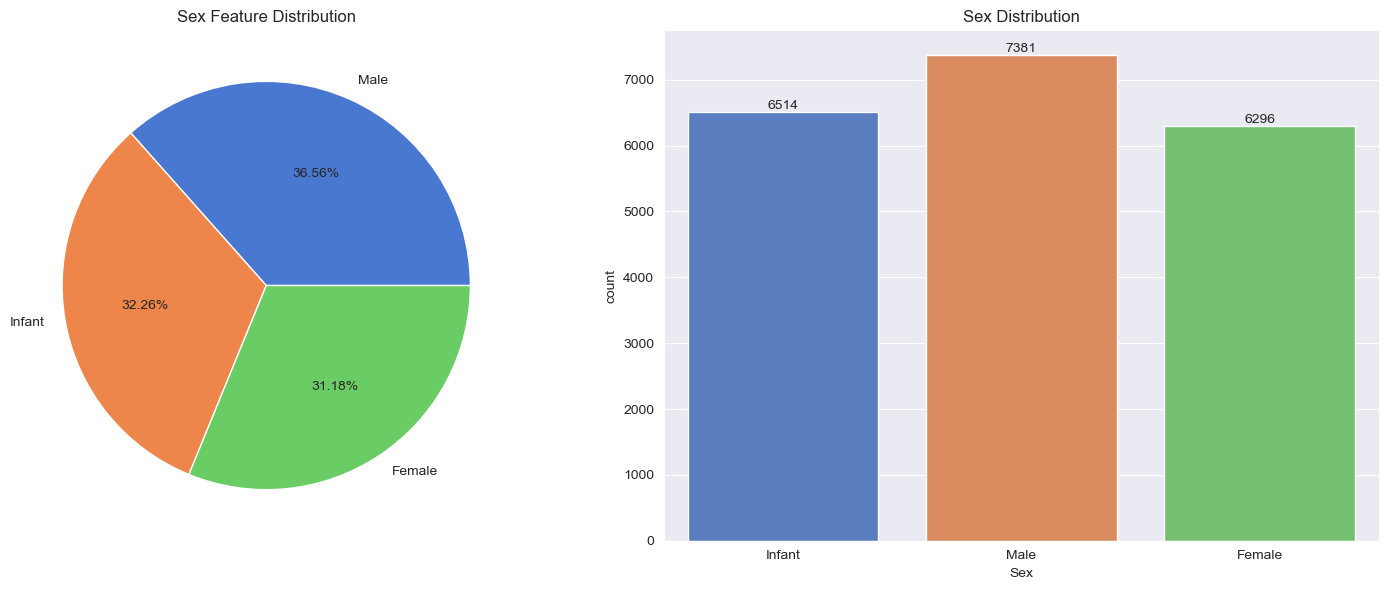

In [14]:
# Plot a Pie Chart
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.pie(Pie.values.ravel(),labels=Pie.index,autopct="%0.2f%%")
plt.title("Sex Feature Distribution")

# Plot a Bar Chart
plt.subplot(1,2,2)
ax = sns.countplot(x="Sex",data=train_df1)
for container in ax.containers:
    ax.bar_label(container)
plt.title("Sex Distribution")
plt.tight_layout()
plt.show()

<div style="font-family:Roboto;background-color:black; padding:30px; font-size:20px">

💡 We can observe that there are more of Male gender contained in the dataset followed by Infants and then Female gender.<br>

</div>

<h3 style="font-family: Roboto;text-align:center;letter-spacing: 1px;"><b>Visualization of the Distribution of the Sex Feature with respect to Age.</h3>

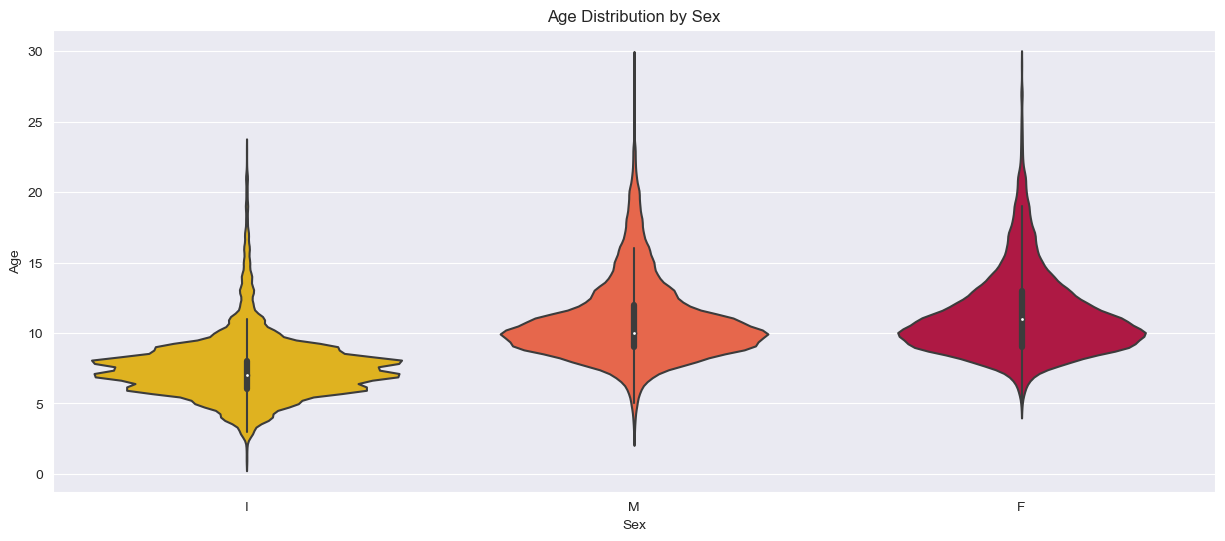

In [15]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(15, 6))

# Define a custom color palette
colors = ['#FFC300', '#FF5733', '#C70039']

# Violin plot with custom color palette
sns.violinplot(x='Sex', y='Age', data=train_df, palette=colors, ax=ax)


# Add labels and title
ax.set_xlabel('Sex')
ax.set_ylabel('Age')
ax.set_title('Age Distribution by Sex')

# Show the plot
plt.show()


<div style="font-family:Roboto;background-color:black; padding:30px; font-size:20px">

💡 The distribution of Age varies across different Sex categories, with Females generally having a higher age than males and infants.<br>

</div>

<h3 style="font-family: Roboto;text-align:center;letter-spacing: 1px;"><b>Visualization of Features to Understand their Distributions.</h3>

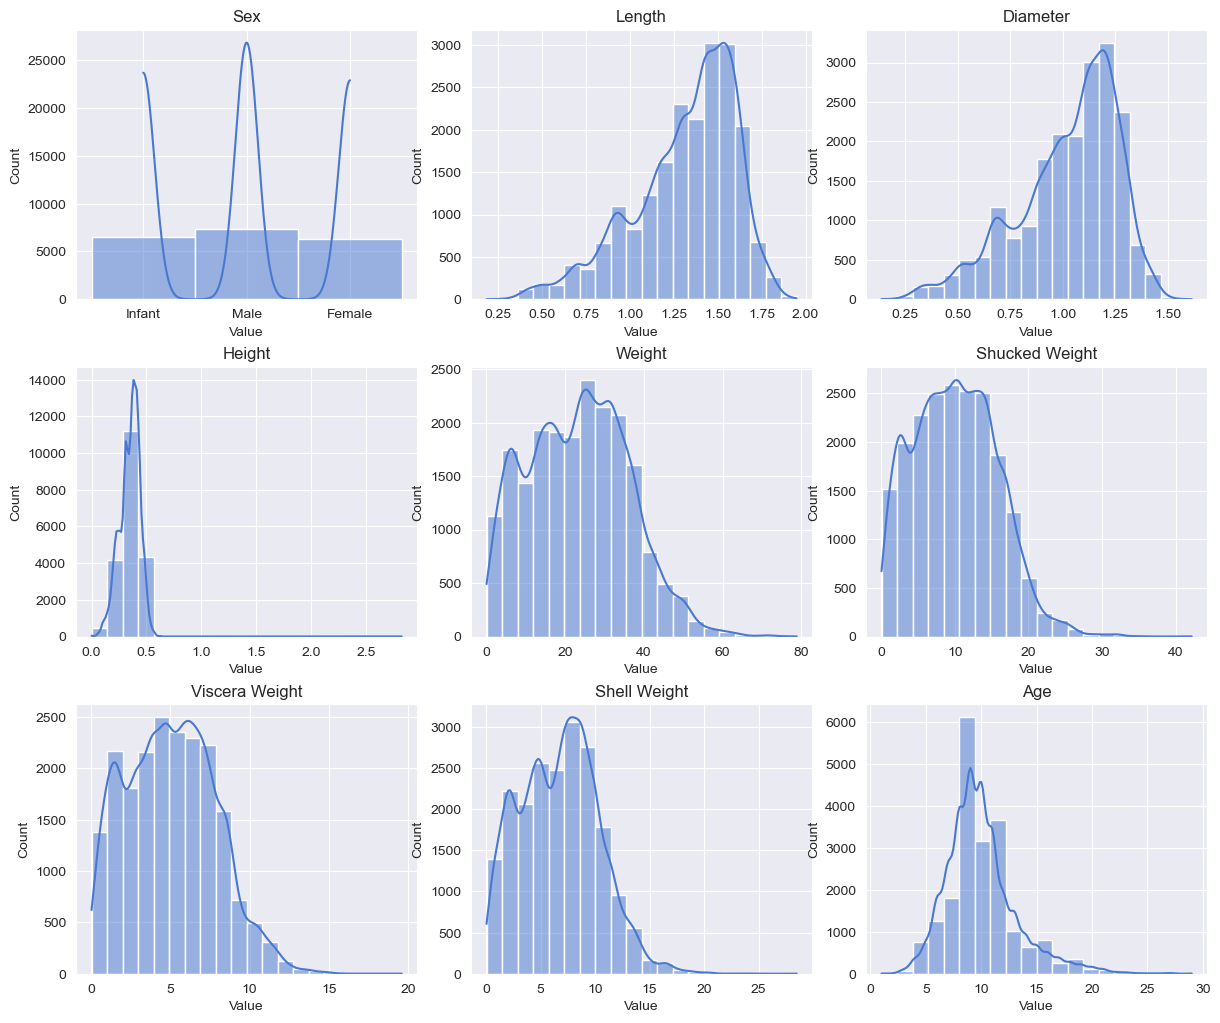

In [16]:
num_cols = 3
num_rows = -(-len(train_df1.columns) // num_cols) 

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 10))
fig.tight_layout(h_pad=3.0)

for i, column in enumerate(train_df1.columns):
    ax = axes.flatten()[i]
    sns.histplot(train_df1[column], kde=True, bins=20, ax=ax)
    ax.set_xlabel('Value')
    ax.set_ylabel('Count')
    ax.set_title(column)

# Remove any unused subplots
for i in range(len(train_df1.columns), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.show()


<div style="font-family:Roboto;background-color:black; padding:30px; font-size:20px">

💡 Age feature has a fairly normal distribution.<br>

💡Heights feature contains a lot of outliers.<br>

💡Length and Diameter have negative skewness.<br>

💡All the other features are postively skewed.<br>

</div>

<h3 style="font-family: Roboto;text-align:center;letter-spacing: 1px;"><b>Boxplots to Identify Outliers and Investigate the distribution of Numerical Features.</h3>

In [17]:
numerical_features = train_df.select_dtypes(include=[np.number]).columns
categorical_features = train_df.select_dtypes(include=['object']).columns

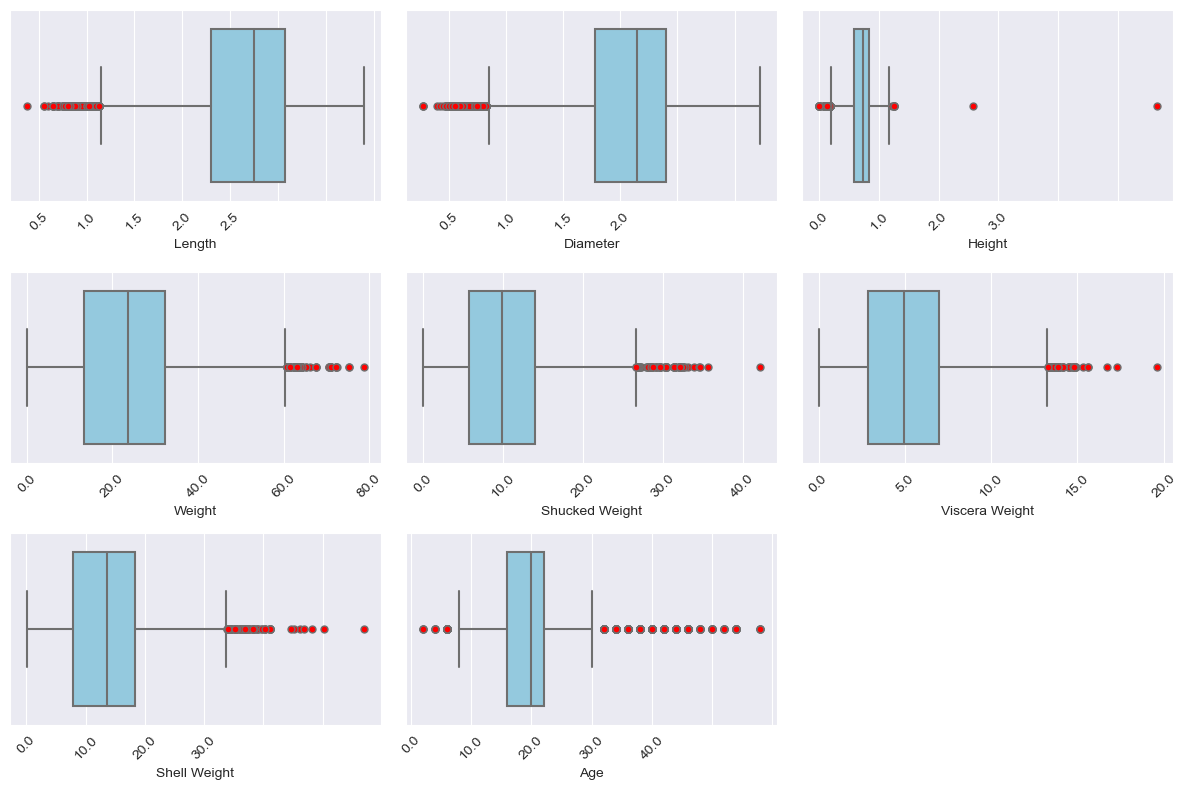

In [18]:
# Calculate the number of rows and columns for the subplot grid
num_rows = int(np.ceil(len(numerical_features) / 3))
num_cols = min(len(numerical_features), 3)

# Set the figure size and create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Flatten the axes array for ease of indexing
axes = axes.flatten()

# Iterate over each numerical column and plot a boxplot
for i, column in enumerate(numerical_features):
    sns.boxplot(x=train_df[column], color='skyblue', flierprops=dict(marker='o', markersize=5, markerfacecolor='red'), ax=axes[i])
    axes[i].set_xticklabels(axes[i].get_xticks(), rotation=45)
    axes[i].set_xlabel(column)

# Hide any empty subplots
if len(numerical_features) < len(axes):
    for j in range(len(numerical_features), len(axes)):
        axes[j].axis('off')

# Adjust the layout and spacing
plt.tight_layout()

# Display the subplots
plt.show()


<div style="font-family:Roboto;background-color:black; padding:30px; font-size:20px">

💡Most of the features contain outliers.<br>

💡Height Feature have extreme outliers.<br>


</div>

<h3 style="font-family: Roboto;text-align:center;letter-spacing: 1px;"><b>Exploring the relationships between Numerical Features and the Target Variable(Age) using scatter plots.</h3>

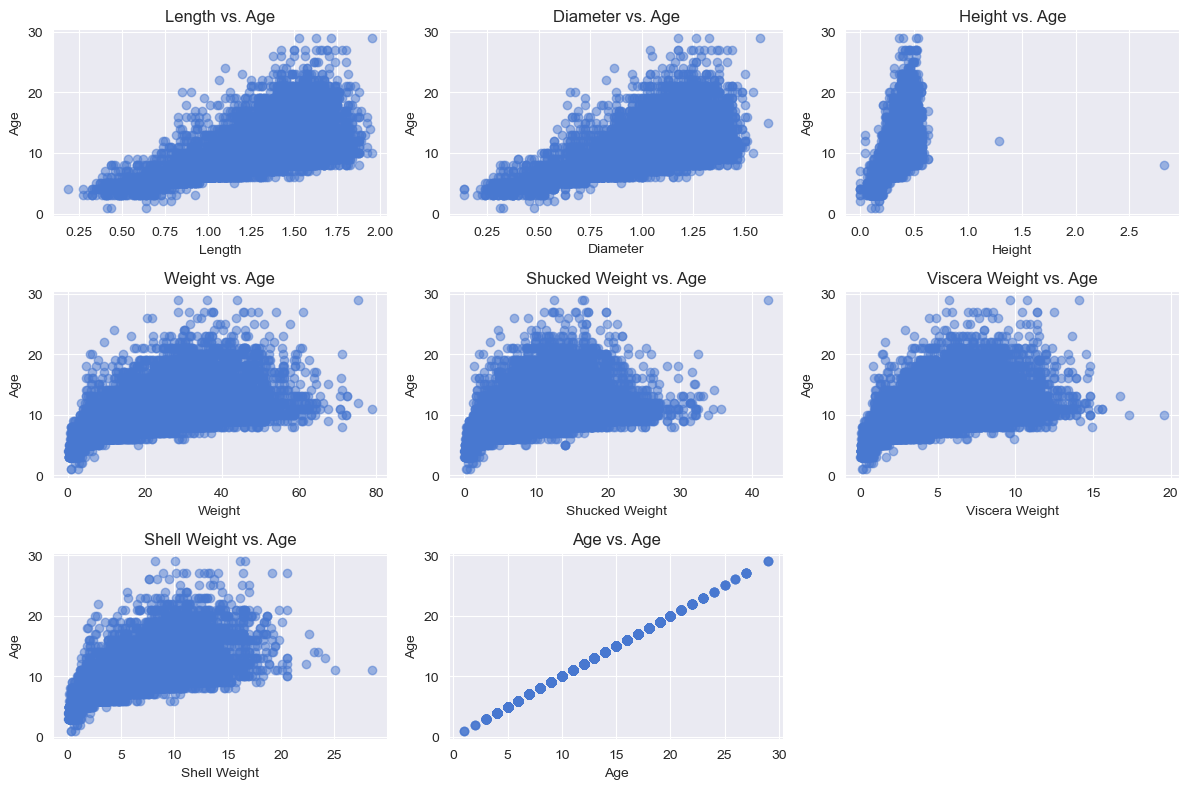

In [19]:
# Calculate the number of rows and columns for the subplot grid
num_rows = int(np.ceil(len(numerical_features) / 3))
num_cols = min(len(numerical_features), 3)

# Set the figure size and create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Flatten the axes array for ease of indexing
axes = axes.flatten()

# Iterate over each numerical column and plot a scatter plot
for i, feature in enumerate(numerical_features):
    axes[i].scatter(train_df[feature], train_df['Age'], alpha=0.5)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Age')
    axes[i].set_title(f'{feature} vs. Age')

# Hide any empty subplots
if len(numerical_features) < len(axes):
    for j in range(len(numerical_features), len(axes)):
        axes[j].axis('off')

# Adjust the layout and spacing
plt.tight_layout()

# Display the subplots
plt.show()

<div style="font-family:Roboto;background-color:black; padding:30px; font-size:20px">

💡 The length and diameter have a strong linear relationship with their Age.<br>

💡The age increases with the length, diameter and height which suggests that these measurements can be used to predict the age.

💡Linear algorithms might perform poorly on the dataset.<br>


</div>

<h3 style="font-family: Roboto;text-align:center;letter-spacing: 1px;"><b>Analyzing the correlations between features using a correlation matrix and a heatmap.</h3>

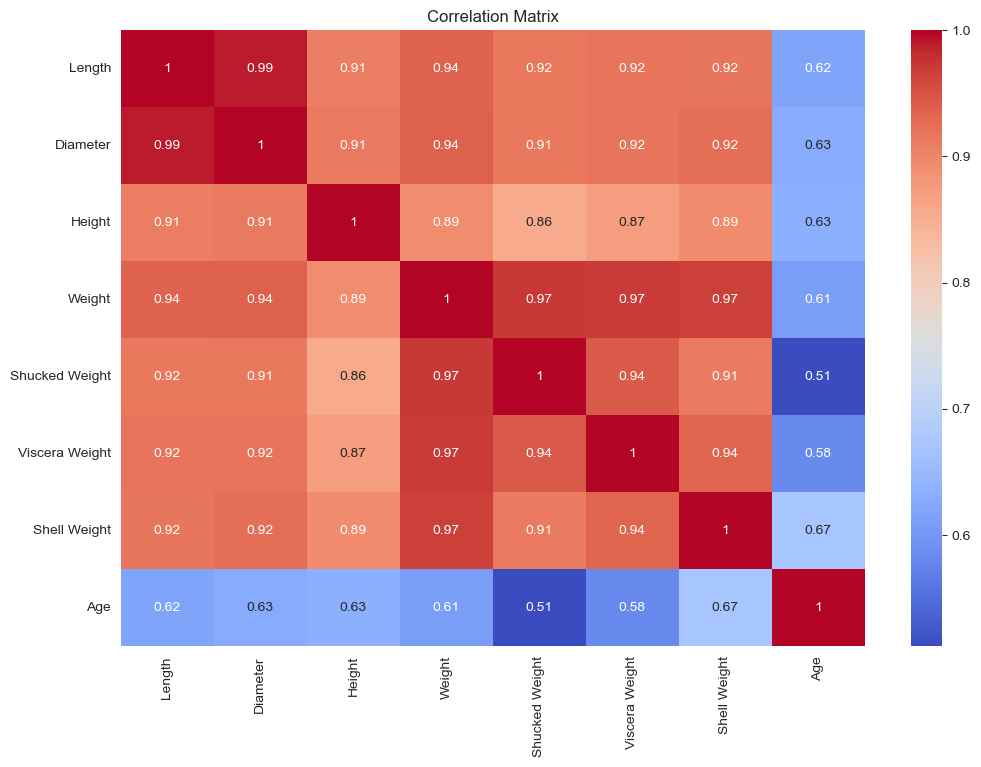

In [20]:
corr_matrix = train_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


<div style="font-family:Roboto;background-color:black; padding:30px; font-size:20px">

💡 The Weight is strongly correlated with the Length, Diameter and Height which suggests that Weight can also be used as a predictor.<br>

💡Age is least correlated with Shucked Weight.<br>

💡Height has least linerity with the remaining features.<br>

💡Age is most linearly proportional with Shell Weight, then Diameter, Height and Length.<br>

💡The correlation matrix heatmap shows that there are strong positive correlations between the physical measurements (length, diameter, height, and weight), but only weak correlations between these measurements and the Age. This suggests that predicting the age from the physical measurements may require additional information.<br>

</div>

<a id="1.1"></a>
<h2 style="font-family: Roboto; font-size: 40px; font-style: normal; font-weight: normal; text-align:center; display:fill; text-decoration: none; padding:20px; letter-spacing: 1px; color: black; background-color:#008080;overflow:hidden;border-radius:10px"><b>Feature Engineering</h2>

<h3 style="font-family: Roboto;text-align:center;letter-spacing: 1px;"><b>Label Encoding.</h3>

In [21]:
train_df['Sex'] = train_df['Sex'].replace({"M":1, "I":0, "F":-1})


<h3 style="font-family: Roboto;text-align:center;letter-spacing: 1px;"><b>Remove Outliers.</h3>

In [22]:
# Calculate the IQR range
Q1 = train_df.quantile(0.25)
Q3 = train_df.quantile(0.75)
IQR = Q3 - Q1

# Define the outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Get the old shape of the dataset
old_shape = train_df.shape

# Remove outliers for each column
for column in train_df.columns:
    train_df = train_df[(train_df[column] >= lower_bound[column]) & (train_df[column] <= upper_bound[column])]

# Get the new shape of the dataset
new_shape = train_df.shape

# Print the old and new shape
print("Old Shape:", old_shape)
print("New Shape:", new_shape)


Old Shape: (20191, 9)
New Shape: (18417, 9)


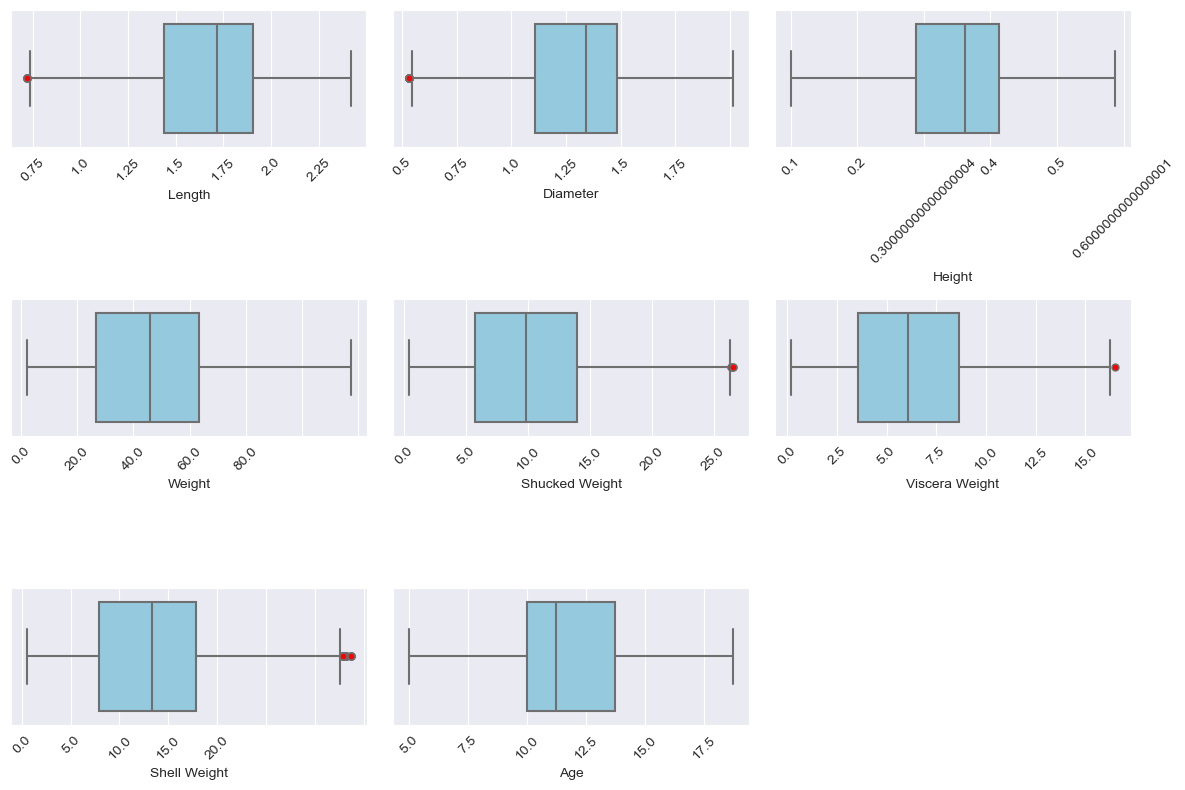

In [23]:
# Calculate the number of rows and columns for the subplot grid
num_rows = int(np.ceil(len(numerical_features) / 3))
num_cols = min(len(numerical_features), 3)

# Set the figure size and create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Flatten the axes array for ease of indexing
axes = axes.flatten()

# Iterate over each numerical column and plot a boxplot
for i, column in enumerate(numerical_features):
    sns.boxplot(x=train_df[column], color='skyblue', flierprops=dict(marker='o', markersize=5, markerfacecolor='red'), ax=axes[i])
    axes[i].set_xticklabels(axes[i].get_xticks(), rotation=45)
    axes[i].set_xlabel(column)

# Hide any empty subplots
if len(numerical_features) < len(axes):
    for j in range(len(numerical_features), len(axes)):
        axes[j].axis('off')

# Adjust the layout and spacing
plt.tight_layout()

# Display the subplots
plt.show()


<div style="font-family:Roboto;background-color:black; padding:30px; font-size:20px">

💡The essence of removing outliers is to ensure the integrity and reliability of your data analysis and modeling process.<br>

💡 Outliers are data points that deviate significantly from the overall pattern or distribution of the data. These extreme values can have a disproportionate impact on statistical measures, model performance, and interpretation of results.<br>

</div>

<a id="1.1"></a>
<h2 style="font-family: Roboto; font-size: 40px; font-style: normal; font-weight: normal; text-align:center; display:fill; text-decoration: none; padding:20px; letter-spacing: 1px; color: black; background-color:#008080;overflow:hidden;border-radius:10px"><b>Data Preprocessing</h2>

<h3 style="font-family: Roboto;text-align:center;letter-spacing: 1px;"><b>Feature Selection.</h3>

In [24]:
X = train_df.drop(columns=["Age"])
Y = train_df["Age"]

<h3 style="font-family: Roboto;text-align:center;letter-spacing: 1px;"><b>Checking for multicolinearity.</h3>

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = train_df.drop(columns=["Age"])
# Compute VIF scores for each predictor variable
vif_scores = pd.DataFrame()
vif_scores["Variable"] = X.columns
vif_scores["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print or analyze the VIF scores
print(vif_scores)


         Variable          VIF
0             Sex     1.009285
1          Length   995.714600
2        Diameter  1071.728591
3          Height   145.162456
4          Weight   374.695339
5  Shucked Weight   110.947285
6  Viscera Weight    80.299005
7    Shell Weight   103.056648


<div style="font-family:Roboto;background-color:black; padding:30px; font-size:20px">

💡Variables with VIF scores close to 1 (e.g., Sex) indicate low multicollinearity, suggesting that these variables are not highly correlated with other predictors in the dataset.<br>

💡Variables with high VIF scores (e.g., Length, Diameter, Weight, Shucked Weight, Viscera Weight, Shell Weight) indicate a strong correlation with other predictor variables. These variables may exhibit multicollinearity, which can impact the stability and interpretability of regression models.<br>

</div>

<h3 style="font-family: Roboto;text-align:center;letter-spacing: 1px;"><b>Splitting the Dataset.</h3>

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


<h3 style="font-family: Roboto;text-align:center;letter-spacing: 1px;"><b>Scaling the Train Data.</h3>

In [27]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standardize the training set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<h3 style="font-family: Roboto;text-align:center;letter-spacing: 1px;"><b>Performing Principal Component Analysis on the Train Data.</h3>

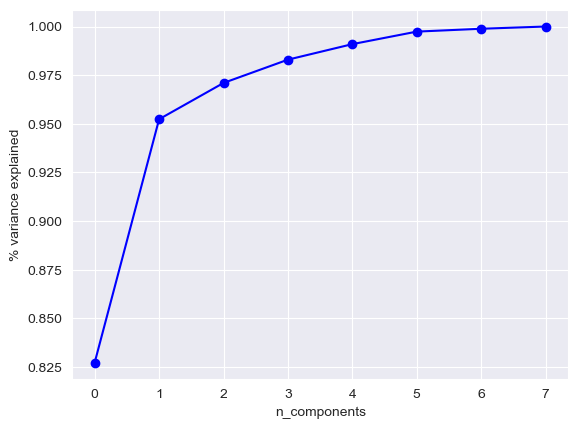

In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components = X_train_scaled.shape[1])
pca_data = pca.fit_transform(X_train_scaled)

percent_var_explained = pca.explained_variance_/(np.sum(pca.explained_variance_))
cumm_var_explained = np.cumsum(percent_var_explained)

plt.plot(cumm_var_explained, marker='o', linestyle='-', color='b')
plt.xlabel("n_components")
plt.ylabel("% variance explained")
plt.show()

In [29]:
cumm_var_explained

array([0.82736971, 0.95237481, 0.97100972, 0.98297369, 0.99094688,
       0.99738439, 0.99884913, 1.        ])

In [30]:
pca.explained_variance_

array([6.61947121, 1.00011836, 0.14909084, 0.0957192 , 0.06379044,
       0.0515041 , 0.01171882, 0.00920767])

In [31]:
sum(pca.explained_variance_ratio_)

1.0

In [32]:
pca = PCA(n_components=6)
pca_X_train = pca.fit_transform(X_train_scaled)
pca_X_test = pca.transform(X_test_scaled)

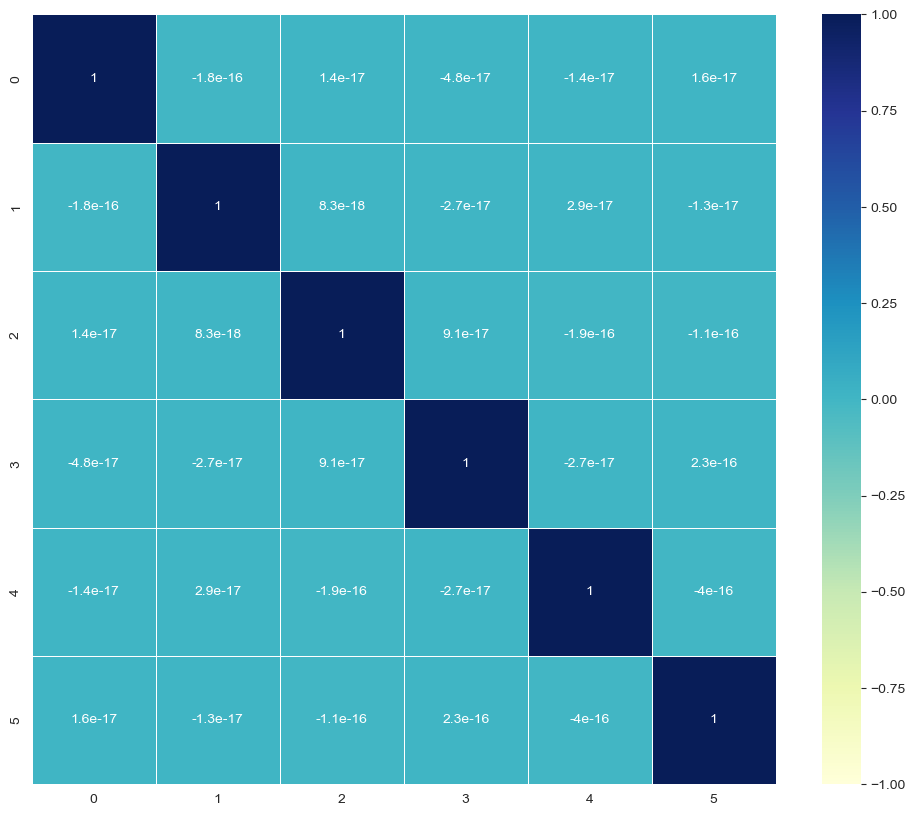

In [33]:
df_train_pca = pd.DataFrame(pca_X_train)

corr = df_train_pca.corr()
plt.figure(figsize = (12,10))

sns.heatmap(corr, annot = True, vmin=-1, vmax=1, cmap="YlGnBu", linewidths=.5)
plt.grid(b=True, color='#f68c1f', alpha=0.1)
plt.show()


<div style="font-family:Roboto;background-color:black; padding:30px; font-size:20px">

💡Since 99.7% of the total variance is captured by the 1st 6 PCA itself, we take only 6 components of PCA and computing a correlation heatmap to overserve the multicollinearity.<br>

💡Hence by reducing the dimensionality of the data using PCA, the variance is preserved by 99.7% and multicollinearity of the data is removed.

</div>

<a id="1.1"></a>
<h2 style="font-family: Roboto; font-size: 40px; font-style: normal; font-weight: normal; text-align:center; display:fill; text-decoration: none; padding:20px; letter-spacing: 1px; color: black; background-color:#008080;overflow:hidden;border-radius:10px"><b>Model Selection and Training</h2>

<h3 style="font-family: Roboto;text-align:center;letter-spacing: 1px;"><b>Modelling Using PCA Data.</h3>

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score


In [35]:
Mean_Squared_Error= []
Root_Mean_Squared_Error = []
Mean_Absolute_Error = []
R2_Score = []

def model(model, polynomial=False):
        if polynomial:
        # For polynomial regression, transform the features to polynomial form
            poly_features = PolynomialFeatures(degree=2).fit_transform(pca_X_train)
            model = LinearRegression()
            model.fit(poly_features, Y_train)
            X_test_poly = PolynomialFeatures(degree=2).fit_transform(pca_X_test)
            Y_pred = model.predict(X_test_poly)  
        else:
            model.fit(pca_X_train, Y_train)
            Y_pred = model.predict(pca_X_test)

        # Evaluate the model
        mse = mean_squared_error(Y_test, Y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(Y_test, Y_pred)
        r2 = r2_score(Y_test, Y_pred)

        print(f"Mean Squared Error: {mse:.2f}")
        print(f"Root Mean Squared Error: {rmse:.2f}")
        print(f"Mean Absolute Error: {mae:.2f}")
        print(f"R-squared: {r2:.2f}")

        Mean_Squared_Error.append(mse)
        Root_Mean_Squared_Error.append(rmse)
        Mean_Absolute_Error.append(mae)
        R2_Score.append(r2)

        return model



In [36]:
Mean_Squared_Error= []
Root_Mean_Squared_Error = []
Mean_Absolute_Error = []
R2_Score = []

def model(model, polynomial=False):
        if polynomial:
        # For polynomial regression, transform the features to polynomial form
            poly_features = PolynomialFeatures(degree=3).fit_transform(pca_X_train)
            model = LinearRegression()
            model.fit(poly_features, Y_train)
            X_test_poly = PolynomialFeatures(degree=3).fit_transform(pca_X_test)
            Y_pred = model.predict(X_test_poly)  
        else:
            model.fit(pca_X_train, Y_train)
            Y_pred = model.predict(pca_X_test)

        # Evaluate the model
        mse = mean_squared_error(Y_test, Y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(Y_test, Y_pred)
        r2 = r2_score(Y_test, Y_pred)

        print(f"Mean Squared Error: {mse:.2f}")
        print(f"Root Mean Squared Error: {rmse:.2f}")
        print(f"Mean Absolute Error: {mae:.2f}")
        print(f"R-squared: {r2:.2f}")

        Mean_Squared_Error.append(mse)
        Root_Mean_Squared_Error.append(rmse)
        Mean_Absolute_Error.append(mae)
        R2_Score.append(r2)

        return model



In [37]:
LR_MODEL= model(LinearRegression())

Mean Squared Error: 2.37
Root Mean Squared Error: 1.54
Mean Absolute Error: 1.17
R-squared: 0.53


In [38]:
POLY_MODEL = model(LinearRegression(), polynomial=True)

Mean Squared Error: 2.14
Root Mean Squared Error: 1.46
Mean Absolute Error: 1.10
R-squared: 0.58


In [39]:
DTR_MODEL = model(DecisionTreeRegressor())

Mean Squared Error: 4.48
Root Mean Squared Error: 2.12
Mean Absolute Error: 1.55
R-squared: 0.12


In [40]:
RFR_MODEL = model(RandomForestRegressor())

Mean Squared Error: 2.30
Root Mean Squared Error: 1.52
Mean Absolute Error: 1.15
R-squared: 0.55


In [41]:
GBR_MODEL = model(GradientBoostingRegressor())

Mean Squared Error: 2.21
Root Mean Squared Error: 1.48
Mean Absolute Error: 1.12
R-squared: 0.57


In [42]:
SVR_MODEL = model(SVR())

Mean Squared Error: 2.19
Root Mean Squared Error: 1.48
Mean Absolute Error: 1.08
R-squared: 0.57


In [43]:
KNN_MODEL = model(KNeighborsRegressor())

Mean Squared Error: 2.57
Root Mean Squared Error: 1.60
Mean Absolute Error: 1.21
R-squared: 0.50


In [44]:
LAS_MODEL = model(Lasso())

Mean Squared Error: 3.02
Root Mean Squared Error: 1.74
Mean Absolute Error: 1.34
R-squared: 0.41


In [45]:
RIG_MODEL = model(Ridge())

Mean Squared Error: 2.37
Root Mean Squared Error: 1.54
Mean Absolute Error: 1.17
R-squared: 0.53


In [46]:
ADA_MODEL = model(AdaBoostRegressor())

Mean Squared Error: 2.76
Root Mean Squared Error: 1.66
Mean Absolute Error: 1.36
R-squared: 0.46


In [47]:
Models = ['Linear Regression', 'Polynomial Regression', 'Decision Tree Regression', 
          'Random Forest Regression', 'Gradient Boost Regression', 'SVR', 'KNeighbors Regressor', 'Lasso', 'Ridge', 'Ada Boost']

Evaluation_df = pd.DataFrame({"Algorithms": Models, 
                              "Mean Squared Error":Mean_Squared_Error,
                               "Root Mean Squared Error":Root_Mean_Squared_Error,
                                 "Mean Absolute Error":Mean_Absolute_Error,
                                   "R2 Score":R2_Score})

Evaluation_df

,Algorithms,Mean Squared Error,Root Mean Squared Error,Mean Absolute Error,R2 Score
0,Linear Regression,2.371676,1.540025,1.165858,0.534542
1,Polynomial Regression,2.140271,1.462966,1.104363,0.579957
2,Decision Tree Regression,4.483170,2.117350,1.551212,0.120147
3,Random Forest Regression,2.298840,1.516193,1.150476,0.548837
4,Gradient Boost Regression,2.205082,1.484952,1.124080,0.567238
5,SVR,2.188665,1.479414,1.083677,0.570460
6,KNeighbors Regressor,2.572501,1.603902,1.207347,0.495129
7,Lasso,3.020422,1.737936,1.338177,0.407222
8,Ridge,2.371677,1.540025,1.165855,0.534542
9,Ada Boost,2.755314,1.659914,1.361802,0.459251


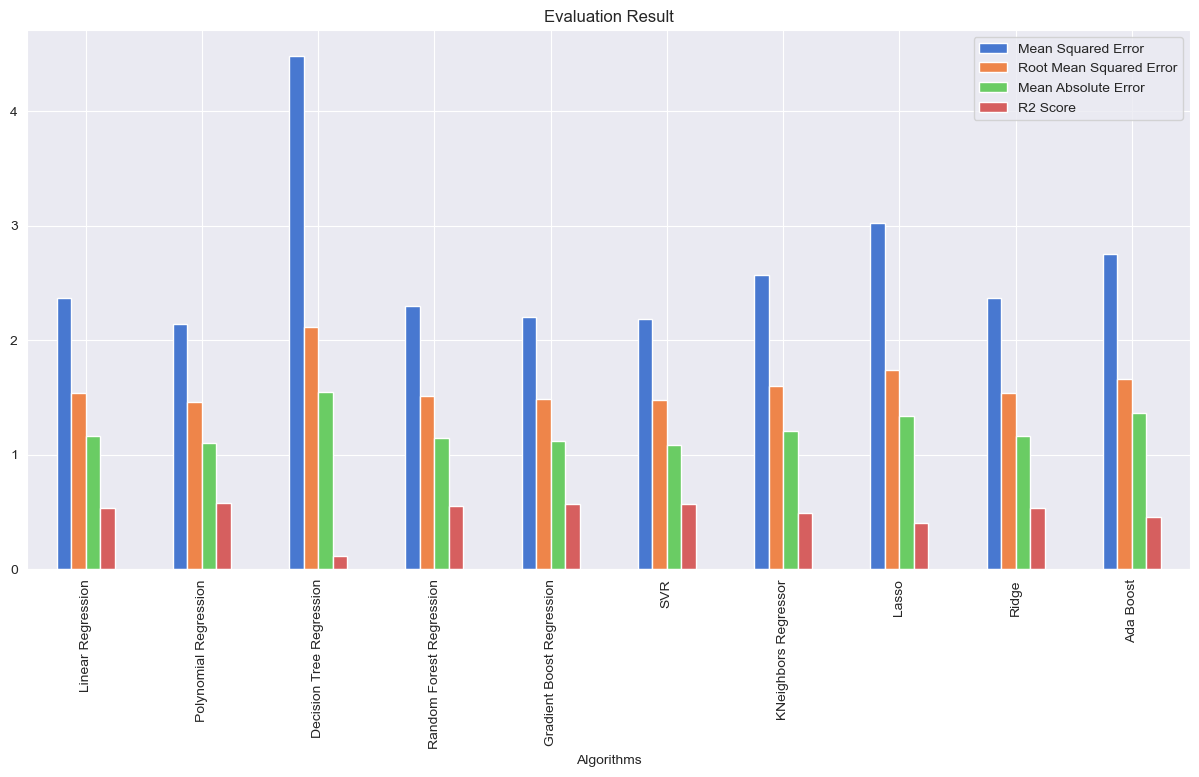

In [48]:
Evaluation_df.plot(x="Algorithms",y=["Mean Squared Error", "Root Mean Squared Error", "Mean Absolute Error", "R2 Score"], figsize=(15,7),kind="bar",
        title="Evaluation Result",)
plt.show()


<div style="font-family:Roboto;background-color:black; padding:30px; font-size:20px">

💡Best performing models are: <br>

- (1) SVR MODEL<br>

- (2) POLYNOMIAL REGRESSION MODEL<br>

- (3) GRADIENT BOOST REGRESSION MODEL<br>


</div>

<a id="1.1"></a>
<h2 style="font-family: Roboto; font-size: 40px; font-style: normal; font-weight: normal; text-align:center; display:fill; text-decoration: none; padding:20px; letter-spacing: 1px; color: black; background-color:#008080;overflow:hidden;border-radius:10px"><b>Model Stacking & Saving</h2>

<h3 style="font-family: Roboto;text-align:center;letter-spacing: 1px;"><b>Model Stacking using Stacking Regressor with 3 Best Performing Models.</h3>

In [49]:
from sklearn.ensemble import StackingRegressor

# Define the stacking model
STKD_MODEL = StackingRegressor(
    estimators=[('PLN_REG', POLY_MODEL), ('GBR_MODEL', GBR_MODEL), ('SVR_MODEL', SVR_MODEL)],
    final_estimator=LinearRegression(),
)

# Fit the stacking model to the data
STKD_MODEL.fit(pca_X_train, Y_train)

# Make predictions using the stacking model
Y_pred_stacked = STKD_MODEL.predict(pca_X_test)

# Evaluate the stacked model
mse_stacked = mean_squared_error(Y_test, Y_pred_stacked)
rmse_stacked = np.sqrt(mse_stacked)
mae_stacked = mean_absolute_error(Y_test, Y_pred_stacked)
r2_stacked = r2_score(Y_test, Y_pred_stacked)

# Print the evaluation metrics rounded to 2 decimal places
print("Stacking Regression (STKD_MODEL):")
print(f"Mean Squared Error (MSE): {mse_stacked:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_stacked:.2f}")
print(f"Mean Absolute Error (MAE): {mae_stacked:.2f}")
print(f"R-squared (R2): {r2_stacked:.2f}")


Stacking Regression (STKD_MODEL):
Mean Squared Error (MSE): 2.15
Root Mean Squared Error (RMSE): 1.47
Mean Absolute Error (MAE): 1.10
R-squared (R2): 0.58


<h3 style="font-family: Roboto;text-align:center;letter-spacing: 1px;"><b>Save Model as Pickle File.</h3>

In [50]:
import joblib

#Save the model as a pickle file
filename = './age_pred_model_stkd.pkl'
joblib.dump(STKD_MODEL, filename)

['./age_pred_model_stkd.pkl']

<a id="1.1"></a>
<h2 style="font-family: Roboto; font-size: 40px; font-style: normal; font-weight: normal; text-align:center; display:fill; text-decoration: none; padding:20px; letter-spacing: 1px; color: black; background-color:#008080;overflow:hidden;border-radius:10px"><b>Prediction</h2>

In [51]:
test_df.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,74051,I,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552
1,74052,I,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930
2,74053,F,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415
3,74054,F,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676
4,74055,I,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066


In [52]:
test = test_df[['id']]
test_df.drop(columns=['id'], inplace=True)
test_df['Sex'] = test_df['Sex'].replace({"M":1, "I":0, "F":-1})

In [53]:
# Define the number of components for PCA
n_components = 6

# Standardize the test data
scaler = StandardScaler()
test_df_scaled = scaler.fit_transform(test_df)

# Create a new PCA model with the specified number of components
pca = PCA(n_components=n_components)

# Fit the PCA model on the standardized test data
test_df_pca = pca.fit_transform(test_df_scaled)



loaded_model = joblib.load(filename)

result = loaded_model.predict(test_df_pca)
result = [round(age, 1) for age in result]
result

[7.5,
 7.9,
 10.3,
 9.2,
 7.7,
 11.4,
 11.1,
 8.2,
 12.2,
 10.5,
 11.2,
 10.1,
 5.4,
 11.7,
 5.5,
 6.4,
 11.1,
 11.8,
 10.6,
 10.8,
 13.5,
 9.6,
 8.6,
 9.3,
 11.0,
 9.8,
 11.7,
 10.7,
 9.5,
 10.9,
 10.8,
 11.1,
 10.4,
 11.5,
 11.4,
 7.3,
 10.0,
 11.3,
 8.7,
 9.9,
 7.5,
 9.8,
 10.1,
 9.9,
 13.2,
 11.2,
 6.6,
 6.3,
 10.5,
 10.0,
 10.9,
 9.7,
 10.8,
 9.6,
 8.6,
 11.6,
 10.3,
 5.4,
 8.9,
 5.8,
 10.4,
 7.0,
 8.8,
 10.5,
 9.2,
 10.8,
 11.4,
 9.8,
 9.2,
 13.3,
 10.5,
 7.1,
 11.2,
 5.3,
 7.6,
 7.3,
 10.6,
 10.4,
 9.7,
 10.1,
 10.5,
 7.8,
 10.6,
 10.5,
 5.0,
 6.8,
 5.7,
 12.9,
 11.0,
 12.3,
 9.4,
 10.9,
 12.6,
 11.4,
 10.6,
 7.9,
 10.0,
 6.0,
 10.4,
 8.0,
 8.7,
 11.7,
 10.2,
 8.7,
 6.6,
 11.7,
 10.7,
 12.3,
 10.0,
 12.0,
 10.4,
 10.6,
 10.0,
 9.8,
 10.4,
 8.9,
 10.7,
 10.3,
 10.9,
 10.4,
 11.9,
 10.9,
 7.7,
 11.3,
 9.5,
 10.4,
 11.3,
 10.1,
 11.7,
 5.9,
 8.7,
 10.1,
 7.6,
 11.2,
 11.3,
 10.1,
 10.0,
 11.8,
 5.9,
 9.4,
 10.8,
 11.2,
 9.2,
 5.4,
 10.8,
 11.0,
 10.1,
 6.9,
 10.3,
 10.6,
 8.4,
 10.

In [54]:
test.head(2)

,id
0,74051
1,74052


In [55]:
test['Age'] = result
test.head(15)

,id,Age
0,74051,7.5
1,74052,7.9
2,74053,10.3
3,74054,9.2
4,74055,7.7
5,74056,11.4
6,74057,11.1
7,74058,8.2
8,74059,12.2
9,74060,10.5


<h3 style="font-family: Roboto;text-align:center;letter-spacing: 1px;"><b>Submission.</h3>

In [56]:
test.to_csv('Age_Prediction_Result.csv', index=False)